In [1]:
from tensorflow.keras.layers import *
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('./dataset/data-final-1.csv', infer_datetime_format=True, header=0, index_col='datetime')

C:\Users\Bintang\AppData\Local\Temp\ipykernel_7892\3605832206.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('./dataset/data-final-1.csv', infer_datetime_format=True, header=0, index_col='datetime')


In [3]:
data.head()

,Temperature,Humidity,Illumination,kat_temperature,kat_humidity,kat_illumination,Kipas,Humidifier,LED
datetime,,,,,,,,,
03/07/2023 0:00:00,28.0,75,76.61,2,2,3,0,0,1
03/07/2023 0:01:00,28.0,75,75.33,2,2,3,0,0,1
03/07/2023 0:02:00,28.0,75,74.49,2,2,3,0,0,1
03/07/2023 0:03:00,28.0,75,74.49,2,2,3,0,0,1
03/07/2023 0:04:00,28.0,75,74.49,2,2,3,0,0,1


In [4]:
data.columns

Index(['Temperature', 'Humidity', 'Illumination', 'kat_temperature',
       'kat_humidity', 'kat_illumination', 'Kipas', 'Humidifier', 'LED'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8866 entries, 03/07/2023 0:00:00 to 10/07/2023 23:16:00
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       8866 non-null   float64
 1   Humidity          8866 non-null   int64  
 2   Illumination      8866 non-null   float64
 3   kat_temperature   8866 non-null   int64  
 4   kat_humidity      8866 non-null   int64  
 5   kat_illumination  8866 non-null   int64  
 6   Kipas             8866 non-null   int64  
 7   Humidifier        8866 non-null   int64  
 8   LED               8866 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 692.7+ KB


In [6]:
data = data[[col for col in data.columns if not col.startswith('kat_')]]

In [7]:
stats = data.describe()
stats.pop('Kipas')
stats.pop('LED') 
stats.pop('Humidifier')
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
Temperature,8866.0,29.948850,1.032873,27.6,28.90,30.20,30.80,32.80
Humidity,8866.0,66.783555,4.345455,54.0,64.00,67.00,70.00,76.00
Illumination,8866.0,73.429239,1.497201,69.6,72.82,73.24,73.65,80.59


In [8]:
train, test = train_test_split(data, test_size=.2, random_state=1)

In [9]:
def norm_data(x):
    return (x - stats['mean']) / stats['std']

def format_output(data):
    fan = np.array(data.pop('Kipas'))
    humid = np.array(data.pop('Humidifier'))
    led = np.array(data.pop('LED'))
    return fan, humid, led    

In [10]:
train_label = format_output(train)
test_label = format_output(test)

In [11]:
train_label

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 1, 0, 0], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 0], dtype=int64))

In [12]:
len(train_label[0]) == len(train)

True

In [13]:
scaler = StandardScaler()
scaler.fit(train)

StandardScaler()

In [14]:
x_train_scaler = scaler.transform(train)
x_test_scaler = scaler.transform(test)

In [15]:
x_train_norm: pd.DataFrame = norm_data(train)
x_test_norm: pd.DataFrame = norm_data(test)

In [16]:
x_train_scaler

array([[ 0.24941899,  0.04644368, -0.12928453],
       [ 0.24941899, -1.11089493, -0.95804148],
       [-0.14080371,  0.50937912, -0.12928453],
       ...,
       [ 1.32253143, -2.03676582,  1.26757195],
       [ 0.83475305, -0.87942721, -0.12928453],
       [ 0.83475305, -0.18502404, -0.12928453]])

In [17]:
x_train_norm = x_train_norm.to_numpy()
x_test_norm = x_test_norm.to_numpy()

In [18]:
type(x_train_norm)

numpy.ndarray

In [19]:
x_train_norm

array([[ 0.24315722,  0.04980947, -0.12639499],
       [ 0.24315722, -1.10081791, -0.95460728],
       [-0.14411218,  0.51006043, -0.12639499],
       ...,
       [ 1.30814806, -2.02131982,  1.26954347],
       [ 0.82406131, -0.87069243, -0.12639499],
       [ 0.82406131, -0.180316  , -0.12639499]])

In [20]:
print("Shape of x_train before reshaping:", x_train_norm.shape)
print("Shape of x_test before reshaping:", x_test_norm.shape)

# Reshape the data to be 3D for LSTM input
x_train_norm = x_train_norm.reshape((x_train_norm.shape[0], 1, x_train_norm.shape[1]))
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0], 1, x_test_norm.shape[1]))

# Check the shape after reshaping
print("Shape of x_train after reshaping:", x_train_norm.shape)
print("Shape of x_test after reshaping:", x_test_norm.shape)


Shape of x_train before reshaping: (7092, 3)
Shape of x_test before reshaping: (1774, 3)
Shape of x_train after reshaping: (7092, 1, 3)
Shape of x_test after reshaping: (1774, 1, 3)


In [21]:
inputs = Input(shape=(x_train_norm.shape[1], x_train_norm.shape[2]))
bc = tf.keras.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=.0001, momentum=.9)

# Siamese neural network

In [22]:
def base_model(input_layer):
    x = Conv1D(32, 5, 1, 'causal', activation='relu')(input_layer)
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64, return_sequences=True)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    return x
    

In [23]:
def final_model(input_layer):
    x = base_model(input_layer)
    fan_output = Dense(1, activation='sigmoid', name='fan_output')(x)
    led_output = Dense(1, activation='sigmoid', name='led_output')(x)   
    humid = Dense(1, activation='sigmoid', name='humid_output')(x)
    return tf.keras.Model(inputs=input_layer, outputs=[fan_output, led_output, humid])

In [24]:
model = final_model(inputs)
model.compile(
    loss= {
        'fan_output': bc, 
        'led_output': bc, 
        'humid_output': bc, 
    },
    optimizer=opt,
    metrics={
        'fan_output': 'accuracy', 
        'led_output': 'accuracy', 
        'humid_output': 'accuracy',
    }
)

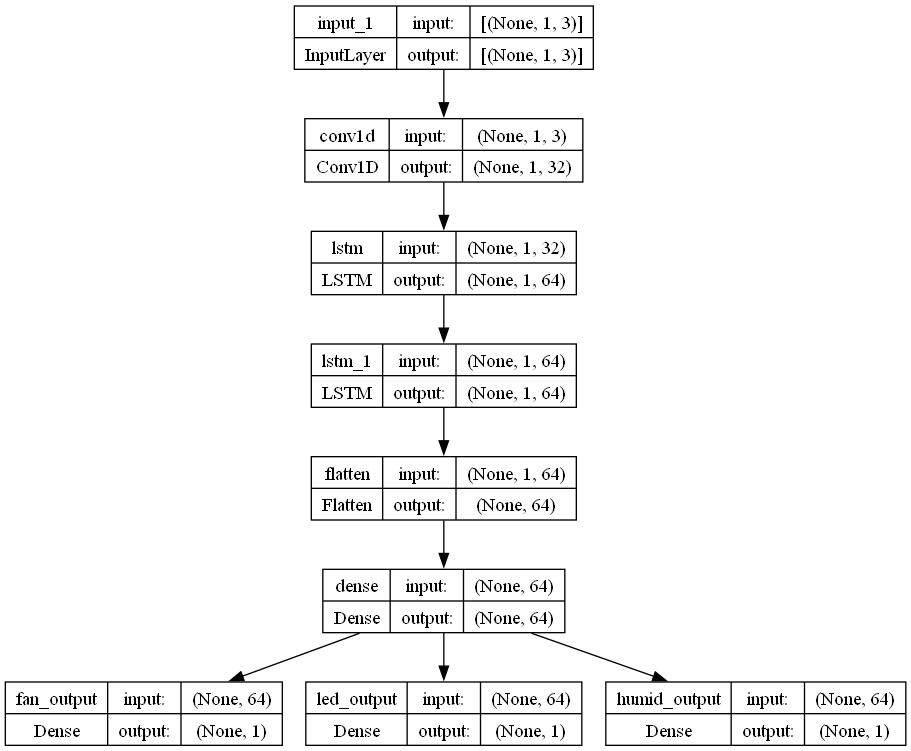

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
H = model.fit(
    x=x_train_norm,
    y=train_label,
    epochs=25,
    # validation_data=(x_test, test_label),
    validation_split=.2,
    verbose=2
)

Epoch 1/25
178/178 - 9s - loss: 2.0354 - fan_output_loss: 0.6661 - led_output_loss: 0.6861 - humid_output_loss: 0.6832 - fan_output_accuracy: 0.9815 - led_output_accuracy: 0.7485 - humid_output_accuracy: 0.7998 - val_loss: 1.9841 - val_fan_output_loss: 0.6348 - val_led_output_loss: 0.6784 - val_humid_output_loss: 0.6709 - val_fan_output_accuracy: 0.9958 - val_led_output_accuracy: 0.7717 - val_humid_output_accuracy: 0.8217 - 9s/epoch - 51ms/step
Epoch 2/25
178/178 - 3s - loss: 1.9336 - fan_output_loss: 0.6036 - led_output_loss: 0.6711 - humid_output_loss: 0.6589 - fan_output_accuracy: 0.9958 - led_output_accuracy: 0.7671 - humid_output_accuracy: 0.8257 - val_loss: 1.8838 - val_fan_output_loss: 0.5729 - val_led_output_loss: 0.6630 - val_humid_output_loss: 0.6479 - val_fan_output_accuracy: 0.9958 - val_led_output_accuracy: 0.7717 - val_humid_output_accuracy: 0.8217 - 3s/epoch - 16ms/step
Epoch 3/25
178/178 - 3s - loss: 1.8383 - fan_output_loss: 0.5451 - led_output_loss: 0.6565 - humid_out

In [28]:
loss, fan_loss, led_loss, humid_loss, fan_acc, led_acc, humid_acc = model.evaluate(x_test_norm, test_label)  

56/56 [==============================] - 1s 10ms/step - loss: 1.1285 - fan_output_loss: 0.0979 - led_output_loss: 0.5551 - humid_output_loss: 0.4755 - fan_output_accuracy: 0.9927 - led_output_accuracy: 0.7559 - humid_output_accuracy: 0.8179


In [29]:
print(
    f"fan loss : {fan_loss * 100 :.2f}",
    f"led loss : {led_loss * 100 :.2f}",
    f"humid loss : {humid_loss * 100 :.2f} \n",
    f"total loss : {loss * 100 :.2f} \n",
    f"fan accuracy : {fan_acc * 100 :.2f}",
    f"led accuracy : {led_acc * 100 :.2f}",
    f"humid accuracy : {humid_acc * 100 :.2f}",
    sep='\n'
)

fan loss : 9.79
led loss : 55.51
humid loss : 47.55 

total loss : 112.85 

fan accuracy : 99.27
led accuracy : 75.59
humid accuracy : 81.79


In [30]:
predictions_norm = model.predict(x_test_norm)

56/56 [==============================] - 0s 6ms/step


In [31]:
len(test_label[0]) == len(predictions_norm[0]) 

True

In [32]:
def plot_confusion_matrix(cm, title, labels=[0, 1], ax=None):
    if ax is None:
        ax = plt.gca()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(title, pad=20, fontsize=20, fontweight="bold")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

In [33]:
cm_fan = confusion_matrix(np.array(test_label[0]), np.round(predictions_norm[0]))
cm_led = confusion_matrix(test_label[1], np.round(predictions_norm[1]))
cm_humid = confusion_matrix(test_label[2], np.round(predictions_norm[2]))

In [34]:
to_print = [[cm_fan, 'Fan'], [cm_led, "LED"], [cm_humid, 'Humidifier']]

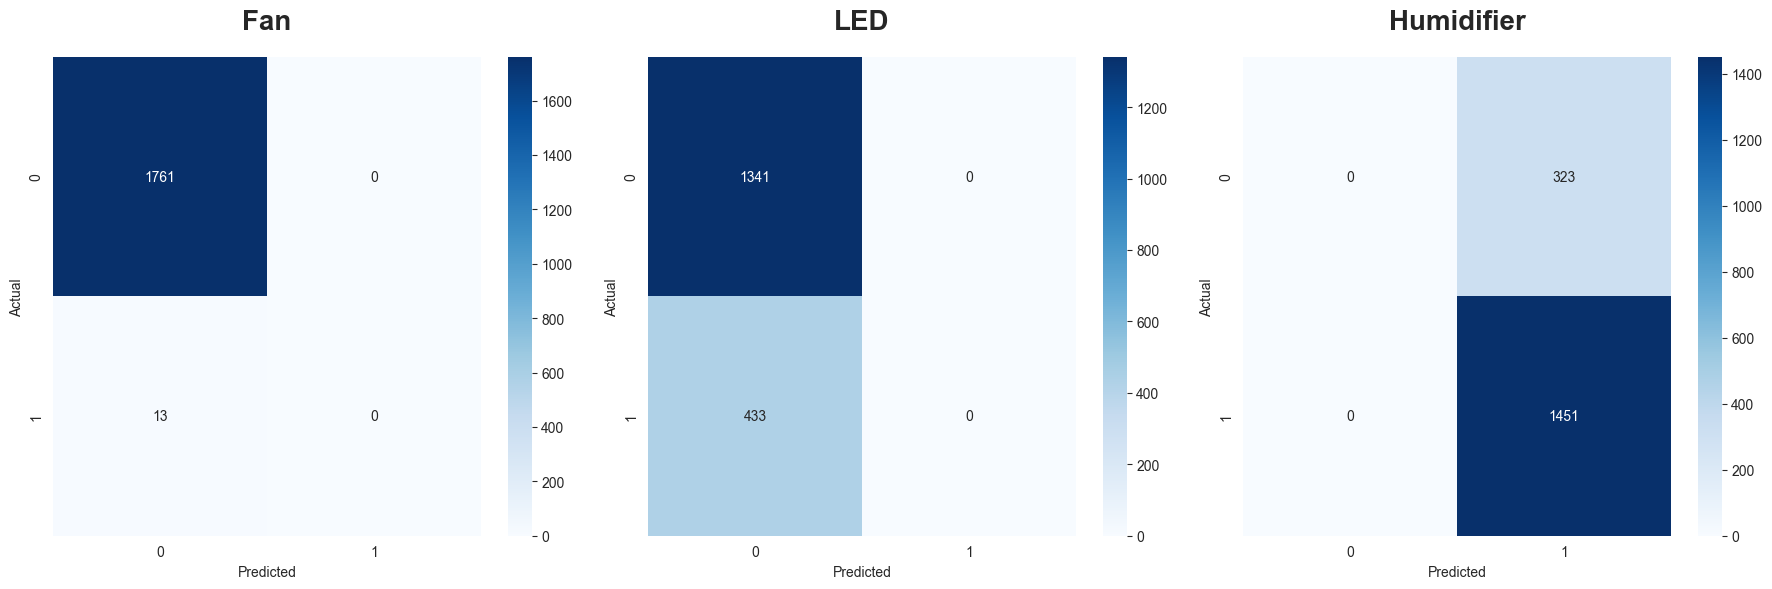

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, var in enumerate(to_print):
    plot_confusion_matrix(var[0], var[1], ax=axes[idx])
    
plt.tight_layout()
plt.show()

In [36]:
model = final_model(inputs)
model.compile(
    loss= {
        'fan_output': bc, 
        'led_output': bc, 
        'humid_output': bc, 
    },
    optimizer=opt,
    metrics={
        'fan_output': 'accuracy', 
        'led_output': 'accuracy', 
        'humid_output': 'accuracy',
    }
)

In [37]:
print("Shape of x_train before reshaping:", x_train_scaler.shape)
print("Shape of x_test before reshaping:", x_test_scaler.shape)

# Reshape the data to be 3D for LSTM input
x_train_scaler = x_train_scaler.reshape((x_train_scaler.shape[0], 1, x_train_scaler.shape[1]))
x_test_scaler = x_test_scaler.reshape((x_test_scaler.shape[0], 1, x_test_scaler.shape[1]))

# Check the shape after reshaping
print("Shape of x_train after reshaping:", x_train_scaler.shape)
print("Shape of x_test after reshaping:", x_test_scaler.shape)


Shape of x_train before reshaping: (7092, 3)
Shape of x_test before reshaping: (1774, 3)
Shape of x_train after reshaping: (7092, 1, 3)
Shape of x_test after reshaping: (1774, 1, 3)


In [38]:
H = model.fit(
    x=x_train_scaler,
    y=train_label,
    epochs=25,
    # validation_data=(x_test, test_label),
    validation_split=.2,
    verbose=2
)

Epoch 1/25
178/178 - 7s - loss: 2.0241 - fan_output_loss: 0.6598 - led_output_loss: 0.6848 - humid_output_loss: 0.6796 - fan_output_accuracy: 0.9958 - led_output_accuracy: 0.7462 - humid_output_accuracy: 0.7908 - val_loss: 1.9611 - val_fan_output_loss: 0.6227 - val_led_output_loss: 0.6748 - val_humid_output_loss: 0.6635 - val_fan_output_accuracy: 0.9958 - val_led_output_accuracy: 0.7717 - val_humid_output_accuracy: 0.8217 - 7s/epoch - 41ms/step
Epoch 2/25
178/178 - 3s - loss: 1.9038 - fan_output_loss: 0.5891 - led_output_loss: 0.6662 - humid_output_loss: 0.6485 - fan_output_accuracy: 0.9958 - led_output_accuracy: 0.7671 - humid_output_accuracy: 0.8257 - val_loss: 1.8481 - val_fan_output_loss: 0.5565 - val_led_output_loss: 0.6569 - val_humid_output_loss: 0.6346 - val_fan_output_accuracy: 0.9958 - val_led_output_accuracy: 0.7717 - val_humid_output_accuracy: 0.8217 - 3s/epoch - 16ms/step
Epoch 3/25
178/178 - 3s - loss: 1.7973 - fan_output_loss: 0.5267 - led_output_loss: 0.6500 - humid_out

In [39]:
predictions_scaler = model.predict(x_test_scaler)

56/56 [==============================] - 2s 6ms/step


In [40]:
cm_fan = confusion_matrix(np.array(test_label[0]), np.round(predictions_scaler[0]))
cm_led = confusion_matrix(test_label[1], np.round(predictions_scaler[1]))
cm_humid = confusion_matrix(test_label[2], np.round(predictions_scaler[2]))

In [42]:
loss, fan_loss, led_loss, humid_loss, fan_acc, led_acc, humid_acc = model.evaluate(x_test_norm, test_label)  

56/56 [==============================] - 1s 9ms/step - loss: 1.1187 - fan_output_loss: 0.0903 - led_output_loss: 0.5544 - humid_output_loss: 0.4740 - fan_output_accuracy: 0.9927 - led_output_accuracy: 0.7559 - humid_output_accuracy: 0.8179


In [43]:
print(
    f"fan loss : {fan_loss * 100 :.2f}",
    f"led loss : {led_loss * 100 :.2f}",
    f"humid loss : {humid_loss * 100 :.2f} \n",
    f"total loss : {loss * 100 :.2f} \n",
    f"fan accuracy : {fan_acc * 100 :.2f}",
    f"led accuracy : {led_acc * 100 :.2f}",
    f"humid accuracy : {humid_acc * 100 :.2f}",
    sep='\n'
)

fan loss : 9.03
led loss : 55.44
humid loss : 47.40 

total loss : 111.87 

fan accuracy : 99.27
led accuracy : 75.59
humid accuracy : 81.79


In [44]:
to_print = [[cm_fan, 'Fan'], [cm_led, "LED"], [cm_humid, 'Humidifier']]

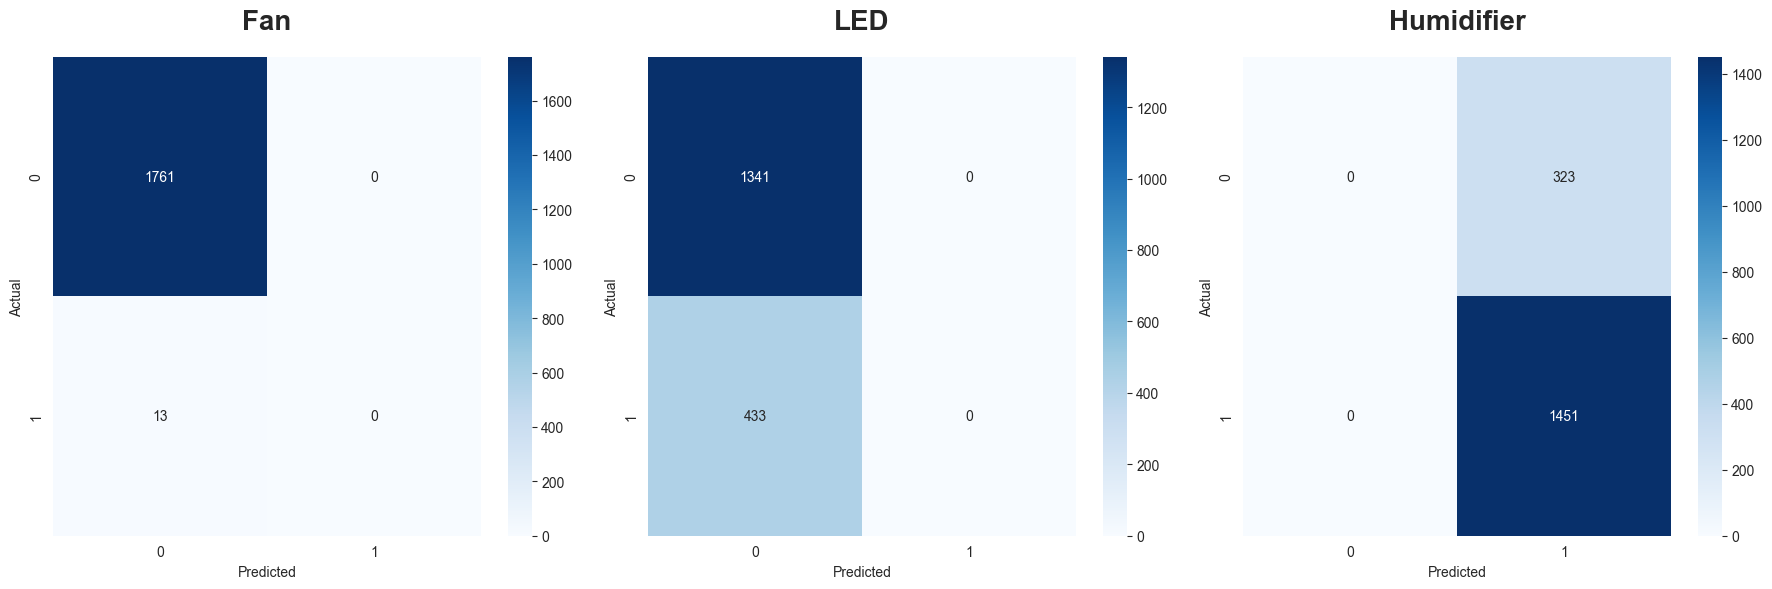

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, var in enumerate(to_print):
    plot_confusion_matrix(var[0], var[1], ax=axes[idx])
    
plt.tight_layout()
plt.show()